<a href="https://colab.research.google.com/github/harshgehlot-code/Loan-approval-model/blob/main/Loan_approval_ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MODEL TRAINING ##

As this is a classification problem so we will be using these models :

    KNeighborsClassifiers
    RandomForestClassifiers
    Support Vector Classifiers (SVC)
    Logistics Regression

To predict the accuracy use the accuracy score function from scikit-learn library.

1.1 Import Data and Required Packages


In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [ ]:
from google.colab import files

    # Replace with the raw CSV file URL obtained from Google Drive
url = "https://drive.google.com/uc?id=1-KGmzSGLY4jlfIGHWkn4eSt-kjD4pShv&export=download"

df = pd.read_csv(url)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.dropna(inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1192,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1193,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
1194,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)
print(df)

(505, 13)
      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
5    LP001011    Male     Yes         2.0      Graduate           Yes   
..        ...     ...     ...         ...           ...           ...   
603  LP002978  Female      No         0.0      Graduate            No   
604  LP002979    Male     Yes         3.0      Graduate            No   
605  LP002983    Male     Yes         1.0      Graduate            No   
606  LP002984    Male     Yes         2.0      Graduate            No   
607  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0 

In [ ]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [ ]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Married' variable:  ",end=" ")
print(df['Married'].unique())

print("Categories in 'Education' variable:  ",end=" ")
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable:  ",end=" ")
print(df['Self_Employed'].unique())


print("Categories in 'Loan_Status' variable:  ",end=" ")
print(df['Loan_Status'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'Married' variable:   ['Yes' 'No']
Categories in 'Education' variable:   ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:   ['No' 'Yes']
Categories in 'Loan_Status' variable:   ['N' 'Y']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  505 non-null    object 
 1   Gender                   505 non-null    object 
 2   Married                  505 non-null    object 
 3   Dependents               505 non-null    float64
 4   Education                505 non-null    object 
 5   Self_Employed            505 non-null    object 
 6   ApplicantIncome          505 non-null    int64  
 7   CoapplicantIncome        505 non-null    float64
 8   LoanAmount               505 non-null    float64
 9   Loan_Amount_Term         505 non-null    float64
 10  Credit_History           505 non-null    float64
 11  Loan_Status              505 non-null    object 
 12  Property_Area_Semiurban  505 non-null    bool   
 13  Property_Area_Urban      505 non-null    bool   
dtypes: bool(2), float64(5), int64(1

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [ ]:
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype(int)
df['Property_Area_Urban'] = df['Property_Area_Urban'].astype(int)


In [ ]:
print(df.dtypes[['Property_Area_Semiurban', 'Property_Area_Urban']])
print(df[['Property_Area_Semiurban', 'Property_Area_Urban']].head())


Property_Area_Semiurban    int64
Property_Area_Urban        int64
dtype: object
   Property_Area_Semiurban  Property_Area_Urban
1                        0                    0
2                        0                    1
3                        0                    1
4                        0                    1
5                        0                    1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  505 non-null    int64  
 1   Gender                   505 non-null    int64  
 2   Married                  505 non-null    int64  
 3   Dependents               505 non-null    float64
 4   Education                505 non-null    int64  
 5   Self_Employed            505 non-null    int64  
 6   ApplicantIncome          505 non-null    int64  
 7   CoapplicantIncome        505 non-null    float64
 8   LoanAmount               505 non-null    float64
 9   Loan_Amount_Term         505 non-null    float64
 10  Credit_History           505 non-null    float64
 11  Loan_Status              505 non-null    int64  
 12  Property_Area_Semiurban  505 non-null    int64  
 13  Property_Area_Urban      505 non-null    int64  
dtypes: float64(5), int64(9)
memory 

In [ ]:
print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1         1.0          0              0   
2          1       1        1         0.0          0              1   
3          2       1        1         0.0          1              0   
4          3       1        0         0.0          0              0   
5          4       1        1         2.0          0              1   
..       ...     ...      ...         ...        ...            ...   
603      500       0        0         0.0          0              0   
604      501       1        1         3.0          0              0   
605      502       1        1         1.0          0              0   
606      503       1        1         2.0          0              0   
607      504       0        0         0.0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

following features have varying ranges and are not scaled:

    ApplicantIncome: e.g., values like 4583, 3000, 6000, etc.

    CoapplicantIncome: e.g., 1508.0, 0.0, 2358.0, etc.

    LoanAmount: e.g., 128.0, 66.0, 120.0, etc.

    Loan_Amount_Term: e.g., 360.0 consistently, but still a large numerical value.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select columns to scale
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


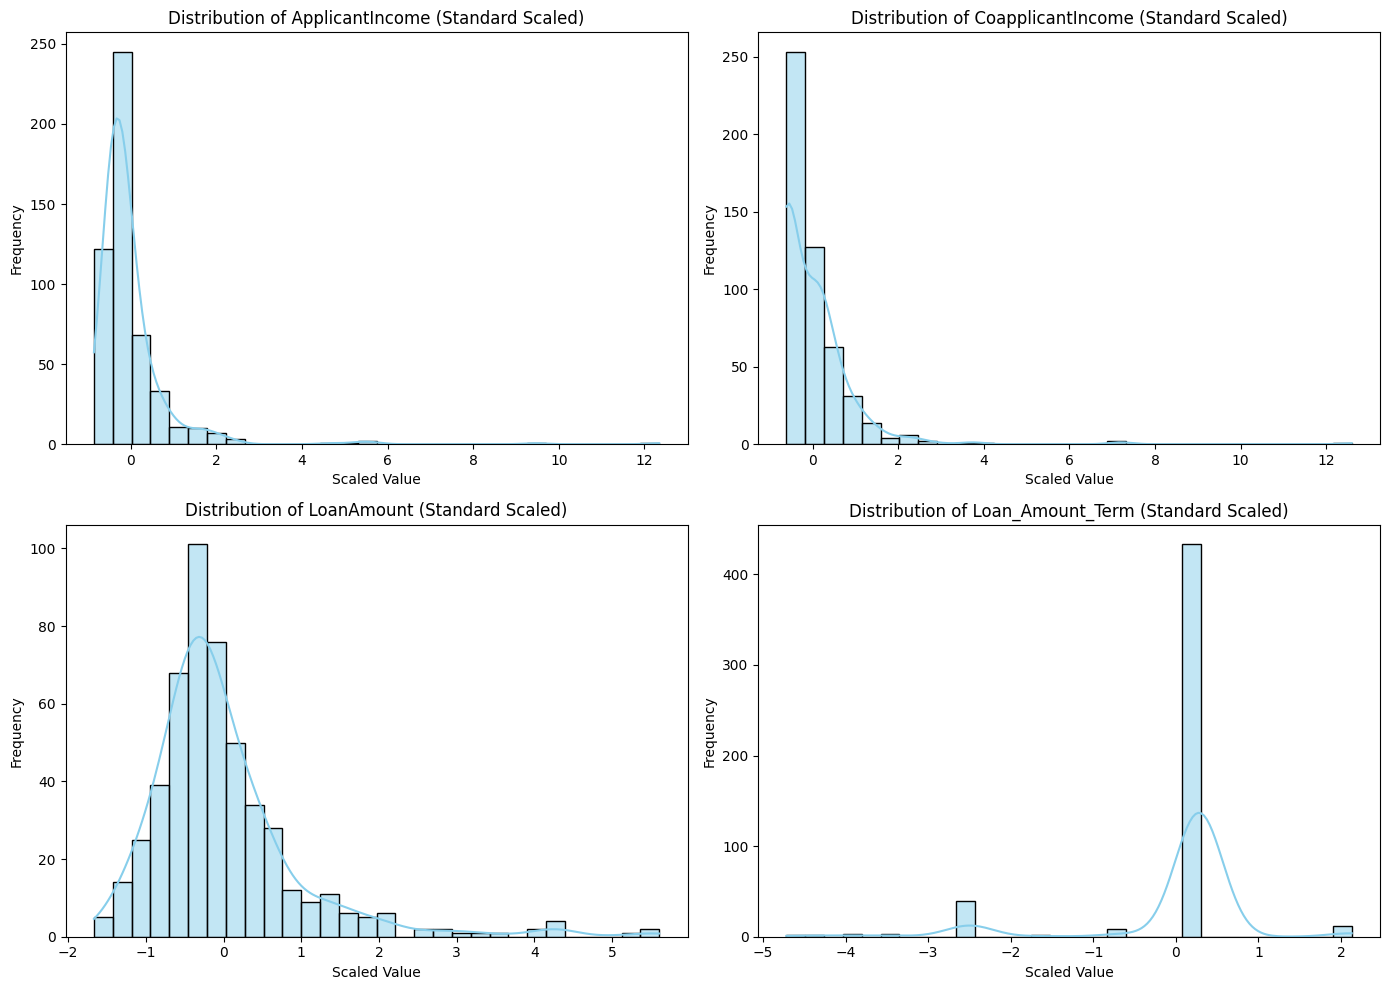

In [ ]:
# Create subplots for each scaled feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_scale, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} (Standard Scaled)')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


One subplot per feature (ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term)

Smooth distribution curves (KDEs) overlaid on histograms

Easy way to spot skewness, spread, and outliers (all scaled around mean = 0)

**Preparing X and Y variables**

In [ ]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [ ]:
# 1. Import necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 2. Assuming df is your original DataFrame
X = df.drop(['Loan_Status'], axis=1)
Y = df['Loan_Status']

# 3. Create New Features
X['Total_Income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X['Income_Loan_Ratio'] = X['Total_Income'] / (X['LoanAmount'] + 1)
X['Loan_per_Dependent'] = X['LoanAmount'] / (X['Dependents'] + 1)

# 4. Scale / Normalize
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 5. Feature Importance Filter
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, Y)  # Changed y to Y

selector = SelectFromModel(model, threshold="mean", prefit=True)
X_selected = selector.transform(X_scaled)

# 6. Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

# 7. Create final DataFrame
X_final = pd.DataFrame(X_selected, columns=selected_features)

# 8. Now you can convert to NumPy array if needed
X = X_final.values
print(X)

Selected features: Index(['Loan_ID', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Total_Income', 'Income_Loan_Ratio', 'Loan_per_Dependent'],
      dtype='object')
[[-1.72862439 -0.13532411 -0.20395453 ... -0.11788605 -0.0264181
  -0.07376224]
 [-1.72176477 -0.39390801 -0.96726034 ... -0.75482892 -2.3108276
  -1.26793115]
 [-1.71490515 -0.46202519 -0.3024456  ... -0.11411589 -0.02796428
  -0.35042668]
 ...
 [ 1.71490515  0.43460591  1.33496847 ... -0.06142481 -0.01427344
   0.98816423]
 [ 1.72176477  0.3547275   0.52241712 ... -0.19191284 -0.02422102
   0.30730324]
 [ 1.72862439 -0.13532411 -0.14239761 ... -0.5603938  -0.07681372
  -0.12954598]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Remove X = X.values, as X is already a NumPy array
print(X)

[[-1.72862439 -0.13532411 -0.20395453 ... -0.11788605 -0.0264181
  -0.07376224]
 [-1.72176477 -0.39390801 -0.96726034 ... -0.75482892 -2.3108276
  -1.26793115]
 [-1.71490515 -0.46202519 -0.3024456  ... -0.11411589 -0.02796428
  -0.35042668]
 ...
 [ 1.71490515  0.43460591  1.33496847 ... -0.06142481 -0.01427344
   0.98816423]
 [ 1.72176477  0.3547275   0.52241712 ... -0.19191284 -0.02422102
   0.30730324]
 [ 1.72862439 -0.13532411 -0.14239761 ... -0.5603938  -0.07681372
  -0.12954598]]


In [ ]:
#Train-Test Split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(353, 7) (353,)
(152, 7) (152,)


In [ ]:
X.shape

(505, 7)

In [ ]:
#Modeling
#lr=LogisticRegression()
#lr.fit(X_train,Y_train)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  505 non-null    int64  
 1   Gender                   505 non-null    int64  
 2   Married                  505 non-null    int64  
 3   Dependents               505 non-null    float64
 4   Education                505 non-null    int64  
 5   Self_Employed            505 non-null    int64  
 6   ApplicantIncome          505 non-null    float64
 7   CoapplicantIncome        505 non-null    float64
 8   LoanAmount               505 non-null    float64
 9   Loan_Amount_Term         505 non-null    float64
 10  Credit_History           505 non-null    float64
 11  Loan_Status              505 non-null    int64  
 12  Property_Area_Semiurban  505 non-null    int64  
 13  Property_Area_Urban      505 non-null    int64  
dtypes: float64(6), int64(8)
memory 

**Prediction on unknown values**

In [ ]:
#Predictions
y_pred=model.predict(X_train)  #Prediction on known values
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0]


In [ ]:
print(model.predict_proba(X_train))

[[0.23266104 0.76733896]
 [0.25790596 0.74209404]
 [0.26829181 0.73170819]
 [0.23901339 0.76098661]
 [0.21373672 0.78626328]
 [0.244338   0.755662  ]
 [0.15196181 0.84803819]
 [0.21545847 0.78454153]
 [0.18535204 0.81464796]
 [0.1525901  0.8474099 ]
 [0.2518895  0.7481105 ]
 [0.16284727 0.83715273]
 [0.1577013  0.8422987 ]
 [0.24573889 0.75426111]
 [0.18877056 0.81122944]
 [0.87767331 0.12232669]
 [0.88066103 0.11933897]
 [0.20134683 0.79865317]
 [0.17731573 0.82268427]
 [0.25299585 0.74700415]
 [0.13609862 0.86390138]
 [0.18431818 0.81568182]
 [0.2006359  0.7993641 ]
 [0.19854978 0.80145022]
 [0.21598873 0.78401127]
 [0.93478116 0.06521884]
 [0.91540507 0.08459493]
 [0.16784211 0.83215789]
 [0.1823732  0.8176268 ]
 [0.21829531 0.78170469]
 [0.17968813 0.82031187]
 [0.19819841 0.80180159]
 [0.28437456 0.71562544]
 [0.17791347 0.82208653]
 [0.23646371 0.76353629]
 [0.1588812  0.8411188 ]
 [0.1906155  0.8093845 ]
 [0.17689477 0.82310523]
 [0.21122656 0.78877344]
 [0.16286336 0.83713664]


In [ ]:
#Confusion Metrics
from sklearn import metrics
cm=metrics.confusion_matrix(Y_train,y_pred)
print(cm)
print("Train Accuracy:",metrics.accuracy_score(Y_train,y_pred))
print(metrics.classification_report(Y_train,y_pred))

[[ 42  62]
 [  4 245]]
Train Accuracy: 0.8130311614730878
              precision    recall  f1-score   support

           0       0.91      0.40      0.56       104
           1       0.80      0.98      0.88       249

    accuracy                           0.81       353
   macro avg       0.86      0.69      0.72       353
weighted avg       0.83      0.81      0.79       353



In [ ]:
y_pred=model.predict(X_test)  #Predicction on unknown values
print(y_pred)
cm=metrics.confusion_matrix(Y_test,y_pred)
print(cm)
print("Train Accuracy:",metrics.accuracy_score(Y_test,y_pred))
print(metrics.classification_report(Y_test,y_pred))

[1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1]
[[ 23  25]
 [  3 101]]
Train Accuracy: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.88      0.48      0.62        48
           1       0.80      0.97      0.88       104

    accuracy                           0.82       152
   macro avg       0.84      0.73      0.75       152
weighted avg       0.83      0.82      0.80       152



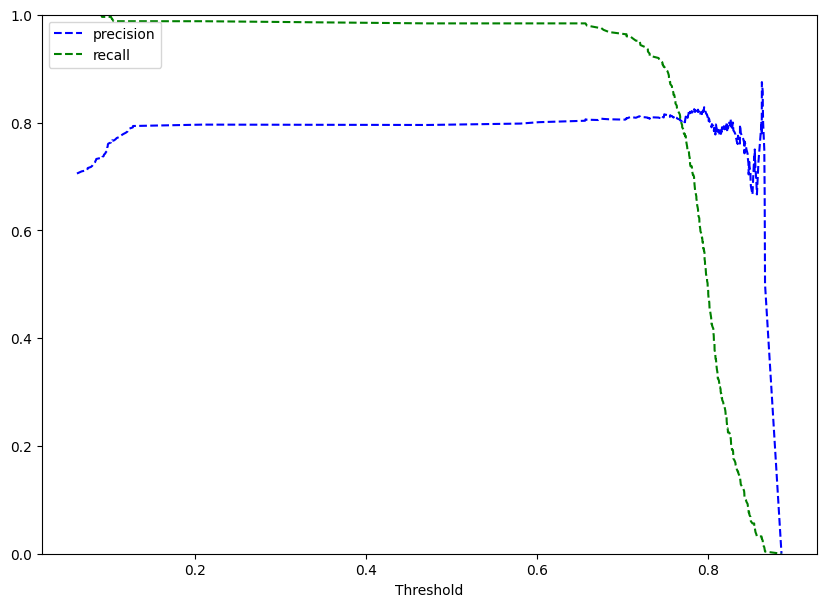

In [ ]:
y_scores_lr = model.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lr, recalls_lr, thresholds_lr = metrics.precision_recall_curve(Y_train, y_scores_lr[:, 1])#Only for positive class

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

This graph is a Precision-Recall vs Threshold curve, commonly used in binary classification problems to help choose the best decision threshold for a classifier.

#Explanation:#

X-axis (Threshold):
This represents the decision threshold used to convert predicted probabilities into class labels. Typically, a classifier like logistic regression outputs probabilities, and a threshold (commonly 0.5) is used to decide between the two classes.

#Y-axis (Precision and Recall):#
This shows how precision and recall change as the threshold varies.

#Blue curve (Precision):#
Precision is the ratio of true positives to the total predicted positives. As the threshold increases, precision generally increases because the model becomes more confident about positive predictions, but it may make fewer of them.

#Orange curve (Recall):#
Recall is the ratio of true positives to the actual positives. As the threshold increases, recall tends to decrease because the model becomes stricter and misses more actual positives.

#Goal:#
You want to find a balance where both precision and recall are reasonably high, depending on your application's requirements.


This kind of plot is useful when tuning the decision threshold to meet a particular precision or recall target (e.g., in medical diagnosis, where missing a positive case might be costly).



This graph shows the trade-off b/w precision & recall.


As recall increases,precision generally decreases.


Closer the curve is to the top-right corner, the better the model's performance , indicating high precision and high recall.

# Let’s import RandomForestClassifier and fit the data.

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3,
                                       n_estimators=100, oob_score=True,min_samples_leaf=10)

In [ ]:
%%time
classifier_rf.fit(X_train, Y_train)

CPU times: user 354 ms, sys: 5.94 ms, total: 360 ms
Wall time: 379 ms


RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_jobs=-1,
                       oob_score=True, random_state=42)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.8101983002832861

In [ ]:
from sklearn import metrics
y_pred=classifier_rf.predict(X_train)
print("Train Accuracy:",metrics.accuracy_score(y_pred,Y_train))

Train Accuracy: 0.8101983002832861


In [ ]:
y_pred=classifier_rf.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_pred,Y_test))

Test Accuracy: 0.8157894736842105


**CONCLUSION**
Your Random Forest model:

Has consistent performance across train, test, and OOB datasets (~81%).

Is likely not overfitting.

Seems to be well-tuned or at least has a good generalization ability.

As this is a classification problem so we will be using these models :

    KNeighborsClassifiers
    RandomForestClassifiers
    Support Vector Classifiers (SVC)
    Logistics Regression

To predict the accuracy use the accuracy score function from scikit-learn library.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.01699716713881
Accuracy score of  KNeighborsClassifier = 86.40226628895185
Accuracy score of  SVC = 83.0028328611898
Accuracy score of  LogisticRegression = 81.30311614730878


In [ ]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 79.60526315789474
Accuracy score of  KNeighborsClassifier = 75.6578947368421
Accuracy score of  SVC = 80.92105263157895
Accuracy score of  LogisticRegression = 81.57894736842105


Text(0, 0.5, 'Predicted')

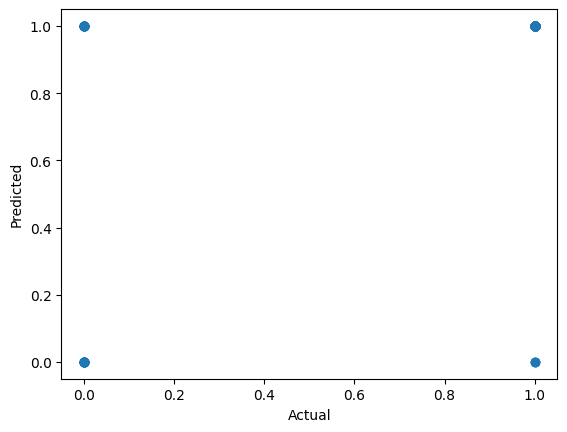

In [ ]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
print(pred_df)

     Actual Value  Predicted Value  Difference
119             1                1           0
130             1                0           1
576             1                1           0
416             0                0           0
479             1                1           0
..            ...              ...         ...
281             1                1           0
402             0                0           0
6               1                1           0
180             0                1          -1
518             1                1           0

[152 rows x 3 columns]
